In [7]:
# Import Packages & Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [10]:
WTI = pd.read_excel("WTI.xls", index_col="Date",parse_dates=True)

In [11]:
WTI.head()

,Price
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


In [12]:
WTI_Price = pd.DataFrame(WTI)

In [13]:
WTI_Price.head()

,Price
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


In [ ]:
plt.plot(WTI_Price["Price"])

In [7]:
#Dickey Fuller test to check stationarity

In [8]:
X = WTI_Price["DailyPrice"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Num of Lags', result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.292440
p-value: 0.632624
Num of Lags 4
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [9]:
#Diff Data

In [54]:
WTI_Price_diff = WTI_Price.diff().dropna()
WTI_Price_diff.head()

,DailyPrice
Date,
2017-01-04,0.90
2017-01-05,0.51
2017-01-06,0.21
2017-01-07,-2.03
2017-01-08,-1.13


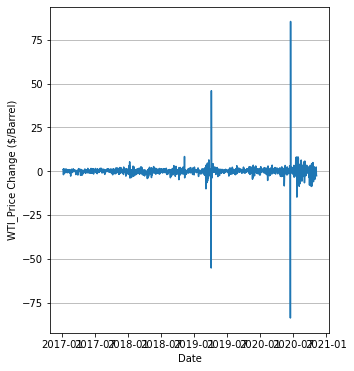

In [55]:
#plot diff data
fig, ax = plt.subplots(figsize=(5, 6))
ax.plot(WTI_Price_diff)
ax.grid(axis="y")
ax.set_xlabel("Date")
ax.set_ylabel("WTI_Price Change ($/Barrel)")
plt.show()

In [50]:
# test
from sklearn.linear_model import LinearRegression
model = sm.OLS(Y,X)
results = model.fit()

In [51]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     15.11
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           0.000106
Time:                        13:14:31   Log-Likelihood:                -3969.2
No. Observations:                1407   AIC:                             7942.
Df Residuals:                    1405   BIC:                             7953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3778      0.364      3.789      0.0

In [52]:
results.tvalues[1]

-3.8874779813461724

In [57]:
Y = WTI_Price_diff["DailyPrice"].values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Num of Lags', result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -26.022250
p-value: 0.000000
Num of Lags 3
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject Ho - Time series is Stationary


In [72]:
# ACF PACF

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

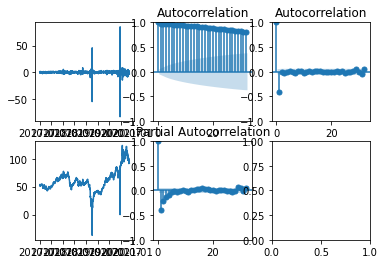

In [59]:
fig,axes=plt.subplots(2,3)
axes[0,0].plot(WTI_Price_diff)
plot_acf(WTI_Price,ax= axes[0,1])
plot_acf(WTI_Price.diff().dropna(),ax= axes[0,2])
axes[1,0].plot(WTI_Price)
plot_pacf(WTI_Price.diff().dropna(),ax= axes[1,1])
plt.show()

In [60]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [61]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [70]:
ARIMA = auto_arima(WTI_Price_diff,trace=True, error_action="ignore", rstepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7613.313, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7957.466, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7709.188, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7609.235, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7955.534, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7609.584, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=7609.664, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7611.461, Time=1.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7607.689, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7608.076, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7608.152, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7707.351, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7609.962, Time=0.51 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 4.952 seconds


In [71]:
ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1407
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3801.844
Date:                Fri, 26 Aug 2022   AIC                           7607.689
Time:                        13:03:55   BIC                           7618.187
Sample:                    01-04-2017   HQIC                          7611.612
                         - 11-10-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5501      0.004   -139.056      0.000      -0.558      -0.542
sigma2        13.0143      0.046    285.457      0.000      12.925      13.104
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):           3635926.92
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              18.25   Skew:                           -10.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       251.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
#Train the model

In [77]:
model=ARIMA(train["DailyPrice"],order=(0,0,1))

In [78]:
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             DailyPrice   No. Observations:                 1125
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3789.435
Date:                Fri, 26 Aug 2022   AIC                           7584.869
Time:                        13:12:41   BIC                           7599.946
Sample:                    01-03-2017   HQIC                          7590.566
                         - 02-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0217      0.453    119.279      0.000      53.134      54.909
ma.L1          0.8231      0.006    129.143      0.000       0.811       0.836
sigma2        49.2984      0.876     56.307      0.000      47.582      51.014
===================================================================================
Ljung-Box (L1) (Q):                 539.46   Jarque-Bera (JB):             14445.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.97   Skew:                            -2.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# make predictions on test set

In [40]:
#predict test dataset

In [79]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type="levels")
print(pred)

2020-02-02    62.290089
2020-02-03    54.021700
2020-02-04    54.021700
2020-02-05    54.021700
2020-02-06    54.021700
                ...    
2020-11-06    54.021700
2020-11-07    54.021700
2020-11-08    54.021700
2020-11-09    54.021700
2020-11-10    54.021700
Freq: D, Name: predicted_mean, Length: 283, dtype: float64


<AxesSubplot:xlabel='Date'>

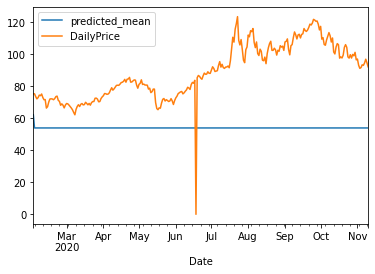

In [80]:
pred.plot(legend=True)
test["DailyPrice"].plot(legend=True)

In [92]:
len(train),(len(WTI_Price)-1)

(1125, 1407)

In [93]:
train=WTI_Price[:1125]
test=WTI_Price[1125:]

In [94]:
pred=model.predict(start=len(train),end=(len(WTI_Price)-1))

In [95]:
pred.head()

2020-02-02    62.290089
2020-02-03    54.021700
2020-02-04    54.021700
2020-02-05    54.021700
2020-02-06    54.021700
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

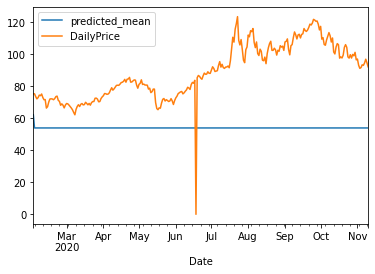

In [96]:
pred.plot(legend=True)
test["DailyPrice"].plot(legend=True)

In [45]:
#model evaluation

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
error=np.sqrt(mean_squared_error(test,pred))
error

6.549989331946817

In [48]:
test.mean(), np.sqrt(test.var())

(DailyPrice    88.711237
 dtype: float64,
 DailyPrice    17.139166
 dtype: float64)

<AxesSubplot:xlabel='Date'>

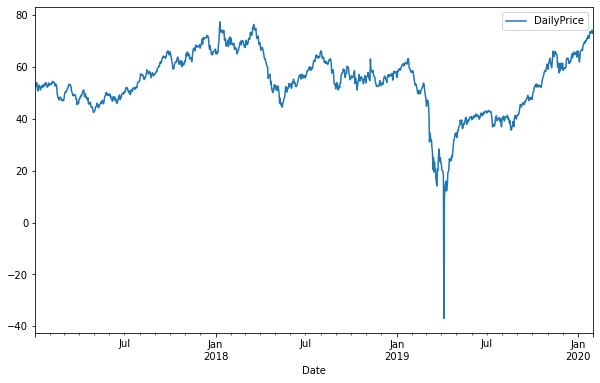

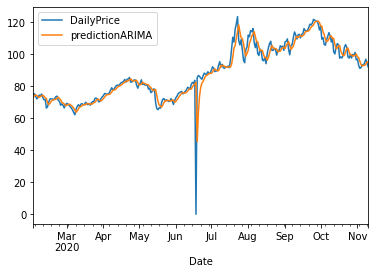

In [49]:
train.plot(legend=True, label="Train", figsize=(10,6))
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="predictionARIMA")